# Calcul des diagrammes de plongement

Le but est de calculer le diagramme de plongement et de mettre en évidence une masse maximun. On se place dans le cas où l'étoile est homogène. Le système TOV s'intégre alors et on a la forme de l'espace temps. 
Dans ce cas, la géométrie de l'espace temps ne dépend que de deux paramètres (R,M) ou (M, $\Xi$). Le diagramme de plongement consiste alors à "plonger" l'espace temps à 4 dimensions dans un espace à 3 dimensions. 

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

%matplotlib notebook

## Tracé du diagramme : 

### 1) Intégration du système TOV 

$$ m(r)	=\begin{cases}
M(r/R)^{3} & pour\,\,r\leq R\\
M & pour\,\,r\geq R
\end{cases}\\
P(r)	=\begin{cases}
\rho_{c}\frac{\sqrt{1-2\Xi(r/R){{}^2}}-\sqrt{1-2\Xi}}{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}} & pour\,\,r\leq R\\
0 & pour\,\,r\geq R
\end{cases}\\
\Phi(r)	=\begin{cases}
c{{}^2}ln\left(\frac{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}}{2}\right) & pour\,\,r\leq R\\
\frac{c{{}^2}}{2}ln\left(1-2\Xi\frac{R}{r}\right) & pour\,\,r\geq R
\end{cases} $$ 


La métrique en coordonnée de Schwarschild s'exprime avec : 
$$ N(r)=e^{\frac{\Phi(r)}{c^{2}}}$$ et $$ A(r)=\frac{1}{\sqrt{1-\frac{2Gm(r)}{rc^{2}}}}$$

### 2) Fonction à tracer pour le diagramme 

La fonction f à tracer vérifie alors (cf document latex) : 

$$
1+\left(\frac{\partial f}{\partial r}\right)^{2}=g_{rr}
$$



Pour le diagramme de plongement, on trace la courbe : 
$$
f(r)=\begin{cases}
2R_{S}\sqrt{\frac{r}{R_{s}}-1}+C & pour\,\,r\leq R\\
-\sqrt{\frac{3c^{2}}{8\pi G\rho}-r²}+C & pour\,\,r\geq R
\end{cases}
$$

In [4]:
c = 1
G = 1

def plongement(r, R, M):   #f ne dépend que de r, R, le rayon de l'objet et M sa masse
    rho = M/(4/3 * np.pi * R**3)  #masse volumique 
    R_s = 2 * G * M/c**2  #rayon de Schwarschild
    a = 3*c**2/(8*np.pi*rho*G)   #facteur dans la racine carré à l'exterieur de l'objet
    if r>R:
        return 2 * R_s * np.sqrt(r/R_s-1) -2 * R_s * np.sqrt(R/R_s-1) - np.sqrt(-R**2+a)
    else :
        return -np.sqrt(-r**2+a)

   
# la suite correspond à d'anciens calculs, qui ne sont pas utile pour la suite
"""    
def m(r, R, M):
    if r >=R : return M
    else : return M * (r/R)**3
    
def phi(r, R, M):
    xi = G*M/(R*c**2)
    if r >= R : return c**2 / 2 * np.log(1 - 2 * xi *R/r)
    else : return c**2 * np.log((3*np.sqrt(1 - 2*xi)-np.sqrt(1-2*xi * (r/R)**2))/2)

def P(r, R, M):
    xi = G*M/(R*c**2)
    if r <= R:
        rho = M/(4/3 * np.pi * R**3)
        return rho * c**2 * (np.sqrt(1-2*xi*(r/R)**2)-np.sqrt(1-2*xi))/(3*np.sqrt(1-2*xi) - np.sqrt(1-2*xi*(r/R)**2))
    else : return 0
    
def A(r, R, M):   
    if r >= R:
        R_c = 2 * G * M/c**2
        return -1/np.sqrt(1-R_c/r)
    elif r>0:
        m_r = m(r,R,M)
        #print(1-R_c/r, '   ', r)
        return -1/np.sqrt(1-2*G*m_r/(r * c**2))
"""

"    \ndef m(r, R, M):\n    if r >=R : return M\n    else : return M * (r/R)**3\n    \ndef phi(r, R, M):\n    xi = G*M/(R*c**2)\n    if r >= R : return c**2 / 2 * np.log(1 - 2 * xi *R/r)\n    else : return c**2 * np.log((3*np.sqrt(1 - 2*xi)-np.sqrt(1-2*xi * (r/R)**2))/2)\n\ndef P(r, R, M):\n    xi = G*M/(R*c**2)\n    if r <= R:\n        rho = M/(4/3 * np.pi * R**3)\n        return rho * c**2 * (np.sqrt(1-2*xi*(r/R)**2)-np.sqrt(1-2*xi))/(3*np.sqrt(1-2*xi) - np.sqrt(1-2*xi*(r/R)**2))\n    else : return 0\n    \ndef A(r, R, M):   \n    if r >= R:\n        R_c = 2 * G * M/c**2\n        return -1/np.sqrt(1-R_c/r)\n    elif r>0:\n        m_r = m(r,R,M)\n        #print(1-R_c/r, '   ', r)\n        return -1/np.sqrt(1-2*G*m_r/(r * c**2))\n"

### Courbe de plongement à une seule dimension
Comme la courbe ne dépend que de r, on peut la tracer uniquement en fonction de r pour se rendre compte de quelques phénomènes. On a bien une valeur critique pour $\Xi = \frac{1}{2}$, comme attendu. A cette valeur, la dérivé de f devient infini en $r=R_{S}$.

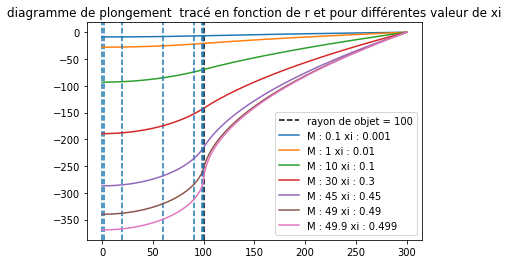

Text(0, 0.5, 'f(r)')

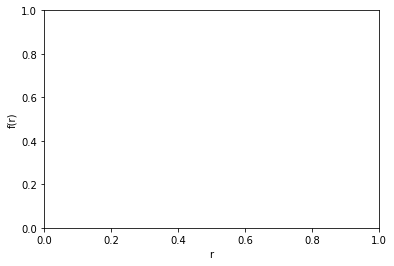

In [6]:
radii = np.linspace(0, 300, 300)
R = 100
plot_M = [0.1, 1, 10, 30, 45, 49, 49.9] 

plt.figure()
plt.axvline(x=R,color='black',linestyle='--', label = 'rayon de objet = ' + str(R) )

for i in range (len(plot_M)):
    M = plot_M[i]
    R_s = 2 * G * M/c**2
    xi = G*M/(R*c**2)
    plt.axvline(x=R_s,linestyle='--')
    z = np.vectorize(plongement)(radii, R, M)-plongement(300, R, M)
    plt.plot(radii, z, label = 'M : ' + str(M) + ' xi : ' + str(round(xi, 3)))
plt.legend()
plt.title("diagramme de plongement  tracé en fonction de r et pour différentes valeur de xi")
plt.show()
plt.xlabel('r')
plt.ylabel('f(r)')

### Graph dans le plan des courbes
On observe bien une compacité maximale au-delà de laquelle l'équilibre n'est plus possible pour $\Xi = \frac{4}{9}$

In [16]:

def graph(R, M):   
    n_radii = 20
    n_angles = 20

    xi = G*M/(R*c**2)
    print(xi, ' xi')
    # Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
    radii_ext = np.linspace(R, 10.0, n_radii)
    radii_int = np.linspace(0, R, n_radii)
    angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

    # Repeat all angles for each radius.
    angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

    # Convert polar (radii, angles) coords to cartesian (x, y) coords.
    # (0, 0) is manually added at this stage,  so there will be no duplicate
    # points in the (x, y) plane.
    X_ext = (radii_ext*np.cos(angles)).flatten()
    Y_ext = (radii_ext*np.sin(angles)).flatten()
    
    X_int = (radii_int*np.cos(angles)).flatten()
    Y_int = (radii_int*np.sin(angles)).flatten()

    # Compute z to make the pringle surface.
    
    z_ext = np.vectorize(plongement)(np.sqrt(np.power(X_ext, 2)+np.power(Y_ext, 2)), R, M)
    z_int = np.vectorize(plongement)(np.sqrt(np.power(X_int, 2)+np.power(Y_int, 2)), R, M)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_trisurf(X_ext, Y_ext, z_ext, linewidth=0.2, antialiased=True, color = 'gray', vmax = -5, vmin = -6)
    ax.plot_trisurf(X_int, Y_int, z_int, linewidth=0.2, antialiased=True, color = 'red')

    plt.show()

widgets.interact_manual(graph, R = widgets.fixed(4) , M = widgets.FloatLogSlider(base = 10, min=-4, max=np.log(4), step = 0.2,  description='Mass'))   

interactive(children=(FloatLogSlider(value=1.0, description='Mass', max=1.3862943611198906, min=-4.0, step=0.2…

<function __main__.graph(R, M)>